<h1>The Impact of Three Events on COVID-19 Case Numbers in Quebec: Regression Discontinuity Design (Project 2)</h1>
<br>
<i>Jeremy Lane, Simon Kiflemariam, Sophia Dekimeche, Tereza Rosier</i>
<br><br>
We conducted three quasi-experiments using regression discontinuty design (RDD) and between-group T-tests to estimate the impact of three events on COVID-19 case numbers in Quebec: (1) the March 20th, 2020 lockdown, (2) the reopening of schools on August 30th, 2020, and (3) the December 25th, 2020 lockdown. We found that after the first lockdown, the number of COVID cases increased; however, the RDD model shows that there was in fact a subsequent decrease in case numbers. The most striking effects that we found are in the increase of cases after the re-opening of schools, and the decrease in cases after the second lockdown.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [2]:
# https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-des-cas-confirmes/resource/d2cf4211-5400-46a3-9186-a81e6cd41de9
data = pd.read_csv('Data/COVID19_Qc_RapportINSPQ_HistoVigie.csv')

# Drop "inconnu"
data = data.drop(data.index[0])

# convert the date column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Create a column in the data that stores the date as a numeric value for regression
data['Date_Num'] = mdates.date2num(data['Date'])

# These are the three columns that we need in our dataframe
df = data[['Date','Date_Num','Nb_Nvx_Cas']]

df = df.dropna()

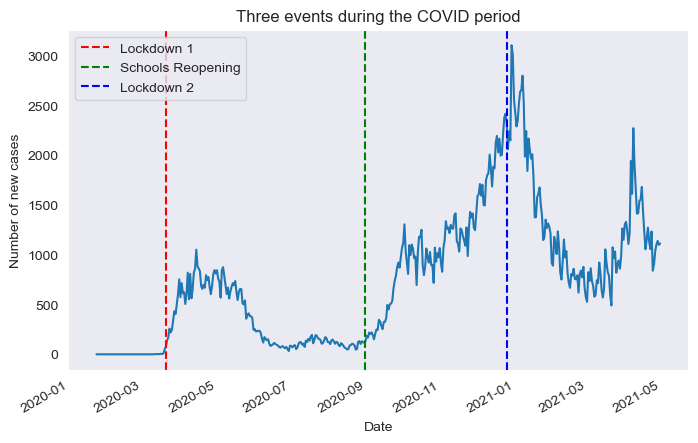

In [3]:
# This plot shows where the three cutoff dates are in the entirety of the dataset

# I selected just the period that includes the three cutoff dates from the dataset
covid_period = df[df['Date'] <= '2021-04-30']

X = covid_period['Date']
y = covid_period['Nb_Nvx_Cas']

sns.set_style('dark')

fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x=X, y=y)

lockdown_1_date = pd.to_datetime('2020-03-20')
schools_reopening_date = pd.to_datetime('2020-08-31')
lockdown_2_date = pd.to_datetime('2020-12-25')

ax.axvline(x=lockdown_1_date, color='red', linestyle='--', label='Lockdown 1')
ax.axvline(x=schools_reopening_date, color='green', linestyle='--', label='Schools Reopening')
ax.axvline(x=lockdown_2_date, color='blue', linestyle='--', label='Lockdown 2')

fig.autofmt_xdate()
plt.title('Three events during the COVID period')
plt.ylabel('Number of new cases')
plt.legend()
plt.savefig('cutoff_dates.png', dpi=300, bbox_inches='tight')
plt.show()

## Lockdown 1 - 20/3/2020

In [4]:
# Define the periods before lockdown 1 and after lockdown 1

# These are the ones with 52 days bef/aft + 5 days gap
# pre_lockdown1 = df[(df['Date'] >= '2020-01-23') & (df['Date'] <= '2020-03-15')]
# post_lockdown1 = df[(df['Date'] >= '2020-03-25') & (df['Date'] <= '2020-05-16')]

pre_lockdown1 = df[(df['Date'] >= '2020-01-23') & (df['Date'] <= '2020-03-15')] # 53 days
post_lockdown1 = df[(df['Date'] >= '2020-03-25') & (df['Date'] <= '2020-06-15')] # 83 days

In [5]:
# Fit the pre-lockdown data to a linear regression model
pre_lockdown1_X = sm.add_constant(pre_lockdown1['Date_Num'])
pre_lockdown1_y = pre_lockdown1['Nb_Nvx_Cas']
pre_lockdown1_lm = sm.OLS(pre_lockdown1_y, pre_lockdown1_X).fit()
pre_lockdown1_pred = pre_lockdown1_lm.predict(pre_lockdown1_X)

In [6]:
# Fit the post-lockdown data to a linear regression model
post_lockdown1_X = sm.add_constant(post_lockdown1['Date_Num'])
post_lockdown1_y = post_lockdown1['Nb_Nvx_Cas']
post_lockdown1_lm = sm.OLS(post_lockdown1_y, post_lockdown1_X).fit()
post_lockdown1_lm.summary()

# We have an r-squared of 0.37, indicating that the model doesn't explain a lot of the variation
# in the data.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     47.78
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           9.96e-10
Time:                        12:39:15   Log-Likelihood:                -552.17
No. Observations:                  83   AIC:                             1108.
Df Residuals:                      81   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.111e+05    1.6e+04      6.947      0.000    7.93e+04    1.43e+05
Date_Num      -6.0103      0.870     -6.912      0.000      -7.740      -4.280
==============================================================================
Omnibus:                        2.859   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.814
Skew:                          -0.434   Prob(JB):                        0.245
Kurtosis:                       2.754   Cond. No.                     1.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Fit the post-lockdown data with a degree of 2 to a linear regression model
post_lockdown1_X = sm.add_constant(post_lockdown1['Date_Num'].copy())
post_lockdown1_X['Date_Num^2'] = post_lockdown1['Date_Num'] ** 2
post_lockdown1_y = post_lockdown1['Nb_Nvx_Cas']
post_lockdown1_lm = sm.OLS(post_lockdown1_y, post_lockdown1_X).fit()
post_lockdown1_pred = post_lockdown1_lm.predict(post_lockdown1_X)
post_lockdown1_lm.summary()

# The r-squared is much higher here, indicating that there's a better fit to the model
# with the second degree.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     207.8
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.09e-32
Time:                        12:39:15   Log-Likelihood:                -495.73
No. Observations:                  83   AIC:                             997.5
Df Residuals:                      80   BIC:                             1005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.064e+08      7e+06    -15.205      0.000    -1.2e+08   -9.24e+07
Date_Num    1.158e+04    760.868     15.213      0.000    1.01e+04    1.31e+04
Date_Num^2    -0.3149      0.021    -15.221      0.000      -0.356      -0.274
==============================================================================
Omnibus:                        3.610   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.887
Skew:                           0.425   Prob(JB):                        0.236
Kurtosis:                       3.337   Cond. No.                     2.23e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

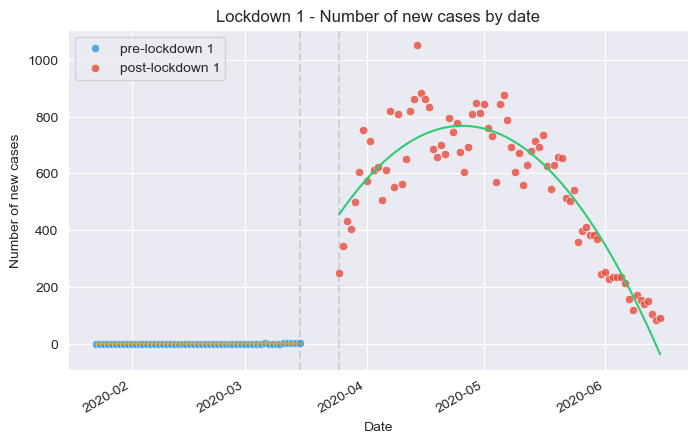

In [8]:
# Plot the pre- and post-lockdown periods
# We chose the second degree here because it's a better fit

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(x=pre_lockdown1['Date'], y=pre_lockdown1['Nb_Nvx_Cas'],
                color='#3498db', label='pre-lockdown 1', alpha=0.8)
sns.scatterplot(x=post_lockdown1['Date'], y=post_lockdown1['Nb_Nvx_Cas'],
                color='#e74c3c', label='post-lockdown 1', alpha=0.8)
sns.lineplot(x=pre_lockdown1['Date'], y=pre_lockdown1_pred, color='#f39c12')
sns.lineplot(x=post_lockdown1['Date'], y=post_lockdown1_pred, color='#2ecc71')
ax.axvline(x=pd.to_datetime('2020-03-15'),color='grey',linestyle='--',alpha=0.25)
ax.axvline(x=pd.to_datetime('2020-03-25'),color='grey',linestyle='--',alpha=0.25)

plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Number of new cases')
plt.title('Lockdown 1 - Number of new cases by date')
fig.autofmt_xdate()
plt.savefig('lockdown1.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Conduct a t-test to see the difference between the pre- and post-lockdown periods
# This is the scipy stats t-test
ttest_ind(pre_lockdown1['Nb_Nvx_Cas'], post_lockdown1['Nb_Nvx_Cas'])
# There's a t-statistic of -17.041 and a p-value of 0.00

TtestResult(statistic=-17.041106802249196, pvalue=2.3638691507998914e-35, df=134.0)

Overall, this analysis provides a visual representation of how the number of new cases evolved before and after Lockdown 1 in 2020 - there was a rise followed by a decline of cases - along with linear regression models fitted to each period. We chose a quadratic model because we noticed a better fit (an increase in the R-squared value from 0.37 to 0.84).

The pre- and post-lockdown periods have different lengths. This is because at the beginning of the COVID period, there was no data on COVID cases - all of the case numbers were at 0. The pre-lockdown period before March 20th, 2020 is a 52-day period in which the case numbers are virtually 0. We chose to extend the post-lockdown period to 83 days to account for a rise and then a decline of COVID cases. Had we chosen to keep the number of days equal for the pre- and post-lockdown periods, the model would have shown only the increase in COVID cases after the lockdown, and not the subsequent decrease.

The between-groups t-test shows a p-value of virtually 0, indicating that there's a significant difference between the pre- and post-lockdown groups.

## School re-opening - 31/8/2020

In [10]:
# Define the periods before and after the schools reopening

# This is 52 days before and after, which we wanted to try originally, but we decided
# to adjust the dates to account for the decline in covid cases after the rise.
# pre_school = df[(df['Date'] >= '2020-07-05') & (df['Date'] <= '2020-08-26')]
# post_school = df[(df['Date'] >= '2020-09-05') & (df['Date'] <= '2020-10-27')]

# These dates show the rise and then the fall of the covid cases
pre_school = df[(df['Date'] >= '2020-07-05') & (df['Date'] <= '2020-08-26')] # 53 days
post_school = df[(df['Date'] >= '2020-09-05') & (df['Date'] <= '2020-11-30')] # 87 days

In [11]:
# Fit a linear regression for the pre-lockdown 1 period
pre_school_X = sm.add_constant(pre_school['Date_Num'].copy())
pre_school_X['Date_Num^2'] = pre_school_X['Date_Num'] ** 2
pre_school_y = pre_school['Nb_Nvx_Cas']
pre_school_lm = sm.OLS(pre_school_y, pre_school_X).fit()
pre_school_pred = pre_school_lm.predict(pre_school_X)

In [12]:
# Fit the post-school reopening data to a linear regression model
post_school_X = sm.add_constant(post_school['Date_Num'])
post_school_y = post_school['Nb_Nvx_Cas']
post_school_lm = sm.OLS(post_school_y, post_school_X).fit()
post_school_pred = post_school_lm.predict(post_school_X)
post_school_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     205.3
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.18e-24
Time:                        12:39:16   Log-Likelihood:                -579.91
No. Observations:                  87   AIC:                             1164.
Df Residuals:                      85   BIC:                             1169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.171e+05   1.52e+04    -14.267      0.000   -2.47e+05   -1.87e+05
Date_Num      11.7536      0.820     14.328      0.000      10.123      13.385
==============================================================================
Omnibus:                        3.628   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.618
Skew:                           0.473   Prob(JB):                        0.164
Kurtosis:                       2.678   Cond. No.                     1.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Fit the post-school reopening data to a linear regression model to the second degree
post_school_X = sm.add_constant(post_school['Date_Num'])
post_school_X['Date_Num^2'] = post_school_X['Date_Num'] ** 2
post_school_y = post_school['Nb_Nvx_Cas']
post_school_lm = sm.OLS(post_school_y, post_school_X).fit()
post_school_pred = post_school_lm.predict(post_school_X)
post_school_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     156.4
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           4.83e-29
Time:                        12:39:16   Log-Likelihood:                -565.81
No. Observations:                  87   AIC:                             1138.
Df Residuals:                      84   BIC:                             1145.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.121e+07   1.08e+07     -5.691      0.000   -8.26e+07   -3.98e+07
Date_Num    6587.1092   1159.435      5.681      0.000    4281.445    8892.774
Date_Num^2    -0.1772      0.031     -5.671      0.000      -0.239      -0.115
==============================================================================
Omnibus:                        1.146   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.836
Skew:                           0.238   Prob(JB):                        0.658
Kurtosis:                       3.065   Cond. No.                     2.10e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

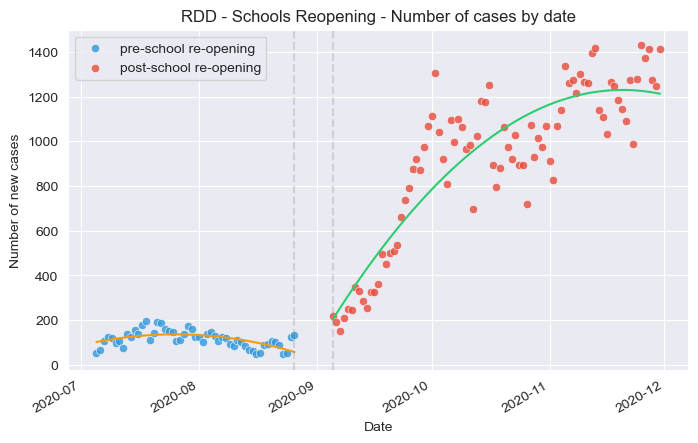

In [14]:
# Plot the pre- and post-school re-opening periods
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(x=pre_school['Date'], y=pre_school['Nb_Nvx_Cas'],
                color='#3498db', label='pre-school re-opening',alpha=0.8)
sns.scatterplot(x=post_school['Date'], y=post_school['Nb_Nvx_Cas'],
                color='#e74c3c', label='post-school re-opening',alpha=0.8)
sns.lineplot(x=pre_school['Date'], y=pre_school_pred, color='#f39c12')
sns.lineplot(x=post_school['Date'], y=post_school_pred, color='#2ecc71')
ax.axvline(x=pd.to_datetime('2020-08-26'),color='grey',linestyle='--',alpha=0.25)
ax.axvline(x=pd.to_datetime('2020-09-05'),color='grey',linestyle='--',alpha=0.25)

plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Number of new cases')
plt.title('RDD - Schools Reopening - Number of cases by date')
plt.grid(True)
fig.autofmt_xdate()
plt.savefig('schools_reopening.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# from scipy.stats import ttest_ind
ttest_ind(pre_school['Nb_Nvx_Cas'], post_school['Nb_Nvx_Cas'])

TtestResult(statistic=-16.58342459548313, pvalue=1.1704599733808918e-34, df=138.0)

We divided the time into two periods: before and after schools reopened during the COVID-19 pandemic in 2020. Initially, we planned to use 52 days before and after, but we adjusted the dates to better match the rise and fall of COVID-19 cases.

The period before school reopening is from July 5, 2020, to August 26, 2020.
The period after school reopening is from September 5, 2020, to November 30, 2020.
We used linear regression to analyze each period:

For the period after school reopening, we used a quadratic model to better fit the data and better visually represent the events (an increased R-square from 0.71 to 0.79). We then visualized the data using a scatter plot, showing the number of new COVID-19 cases over time. The plot includes regression lines for both periods and vertical dashed lines indicating the dates of school reopening.

Additionally, we conducted a statistical test (t-test) to compare the number of new cases between the periods before and after school reopening.

This simplified version provides an overview of the analysis conducted regarding the impact of schools reopening on COVID-19 cases in 2020.

## Lockdown 2

In [16]:
# 52 days bef/aft + 5 days gap
# Define the periods before lockdown 2 and after lockdown 2
pre_lockdown2 = df[(df['Date'] >= '2020-10-29') & (df['Date'] <= '2020-12-20')] # 53 days
post_lockdown2 = df[(df['Date'] >= '2020-12-30') & (df['Date'] <= '2021-02-08')] # 41 days

In [17]:
# Fit the pre-lockdown 2 data a linear regression model
pre_lockdown2_X = sm.add_constant(pre_lockdown2['Date_Num'])
pre_lockdown2_X['Date_Num^2'] = pre_lockdown2_X['Date_Num']**2
pre_lockdown2_y = pre_lockdown2['Nb_Nvx_Cas']
pre_lockdown2_lm = sm.OLS(pre_lockdown2_y, pre_lockdown2_X).fit()
pre_lockdown2_pred = pre_lockdown2_lm.predict(pre_lockdown2_X)

In [18]:
# Fit the post-lockdown 2 data to the first degree to a linear regression model
post_lockdown2_X = sm.add_constant(post_lockdown2['Date_Num'])
post_lockdown2_y = post_lockdown2['Nb_Nvx_Cas']
post_lockdown2_lm = sm.OLS(post_lockdown2_y, post_lockdown2_X).fit()
post_lockdown2_pred = post_lockdown2_lm.predict(post_lockdown2_X)
post_lockdown2_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     311.1
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           3.48e-20
Time:                        12:39:17   Log-Likelihood:                -276.39
No. Observations:                  41   AIC:                             556.8
Df Residuals:                      39   BIC:                             560.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.134e+05   5.17e+04     17.671      0.000    8.09e+05    1.02e+06
Date_Num     -48.8969      2.772    -17.638      0.000     -54.504     -43.289
==============================================================================
Omnibus:                        0.178   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.239
Skew:                           0.142   Prob(JB):                        0.887
Kurtosis:                       2.756   Cond. No.                     2.94e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Fit the post-lockdown 2 data to the second degree to a linear regression model
post_lockdown2_X = sm.add_constant(post_lockdown2['Date_Num'])
post_lockdown2_X['Date_Num^2'] = post_lockdown2_X['Date_Num'] ** 2
post_lockdown2_y = post_lockdown2['Nb_Nvx_Cas']
post_lockdown2_lm = sm.OLS(post_lockdown2_y, post_lockdown2_X).fit()
post_lockdown2_pred = post_lockdown2_lm.predict(post_lockdown2_X)
post_lockdown2_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     173.8
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           7.54e-20
Time:                        12:39:17   Log-Likelihood:                -273.87
No. Observations:                  41   AIC:                             553.7
Df Residuals:                      38   BIC:                             558.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.944e+08   8.68e+07      2.239      0.031    1.86e+07     3.7e+08
Date_Num   -2.081e+04   9315.381     -2.234      0.031   -3.97e+04   -1949.013
Date_Num^2     0.5566      0.250      2.228      0.032       0.051       1.062
==============================================================================
Omnibus:                        0.159   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.344
Skew:                           0.105   Prob(JB):                        0.842
Kurtosis:                       2.604   Cond. No.                     9.66e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.31e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

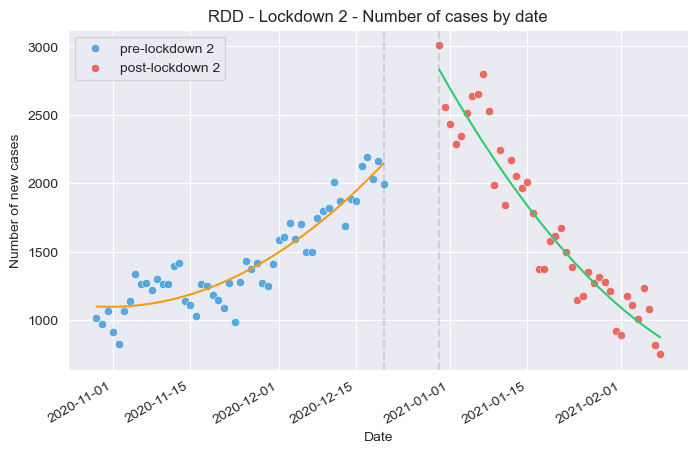

In [20]:
# Plot the pre- and post-lockdown 2 periods
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(x=pre_lockdown2['Date'], y=pre_lockdown2['Nb_Nvx_Cas'],
                color='#3498db', label='pre-lockdown 2', alpha=0.8)
sns.scatterplot(x=post_lockdown2['Date'], y=post_lockdown2['Nb_Nvx_Cas'],
                color='#e74c3c', label='post-lockdown 2', alpha=0.8)
sns.lineplot(x=pre_lockdown2['Date'], y=pre_lockdown2_pred, color='#f39c12')
sns.lineplot(x=post_lockdown2['Date'], y=post_lockdown2_pred, color='#2ecc71')
ax.axvline(x=pd.to_datetime('2020-12-20'),color='grey',linestyle='--',alpha=0.25)
ax.axvline(x=pd.to_datetime('2020-12-30'),color='grey',linestyle='--',alpha=0.25)

plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Number of new cases')
plt.title('RDD - Lockdown 2 - Number of cases by date')
fig.autofmt_xdate()
plt.savefig('lockdown2.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# from scipy.stats import ttest_ind
ttest_ind(pre_lockdown2['Nb_Nvx_Cas'], post_lockdown2['Nb_Nvx_Cas'])

TtestResult(statistic=-2.704438434048655, pvalue=0.008151422920188493, df=92.0)

In our analysis of Lockdown 2 in Quebec, we strategically selected the period from October 29 to December 20, 2020, for a closer examination of the lockdown's impact on COVID-19 cases. To understand this impact, we initially employed a second-degree polynomial in our regression analysis, aiming to capture potential non-linear patterns in the data.

Upon conducting the analysis, we observed that the initial model did not yield statistically significant results. Recognizing the importance of refining our approach, we adjusted the date range to enhance the precision of our findings. This iterative process allowed us to identify a more meaningful relationship between the lockdown and COVID-19 cases. Consequently, we found that this adjustment provided a clearer and statistically significant understanding of how Lockdown 2 influenced the spread . This strategy highlights the importance of exploring and refining analytical approaches to extract meaningful insights from the data.